# Image Transformations

**Goal:** learn some basic techniques for transforming images so that features in them are easier to detect.

In [1]:
%matplotlib inline
import matplotlib
#matplotlib.rcParams['figure.figsize'] = [20, 15]
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:
def cv_show(img):
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# show = cv_show # use OpenCV to show images in a new window

show = plt.imshow

def showg(img):
    plt.imshow(img, cmap='gray')

def showb(img):
    plt.imshow(img, cmap='Greys', interpolation='nearest')

In [3]:
src = cv2.imread("images/face.jpg")

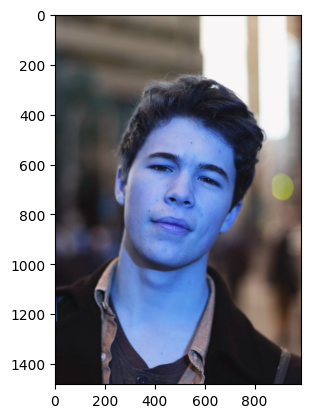

In [4]:
show(src)

## Color Models

Let's display an image in the notebook.

ah: https://www.geeksforgeeks.org/how-to-display-an-opencv-image-in-python-with-matplotlib/

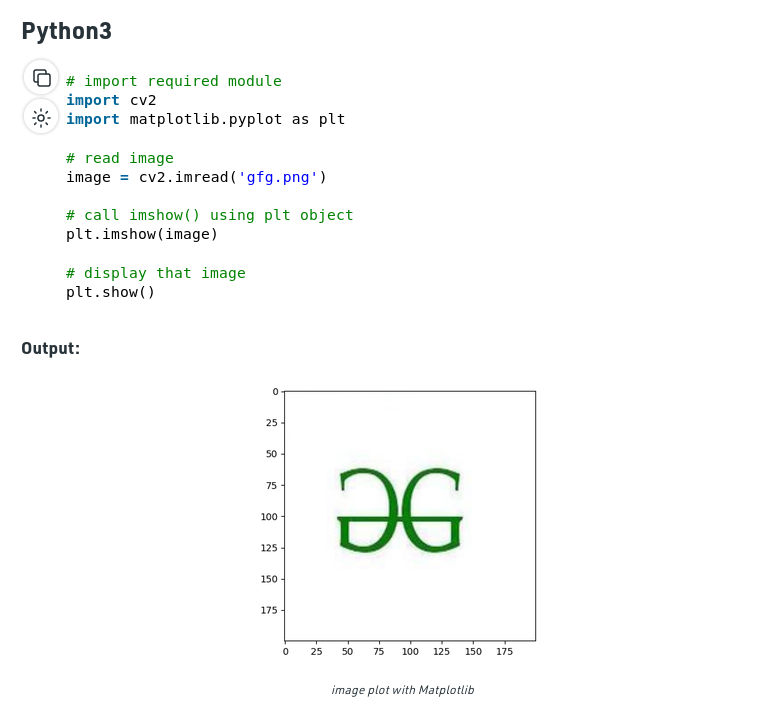

Let's try it...

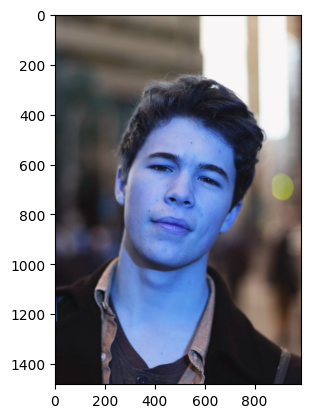

In [5]:
show(src)

OpenCV stores images in BGR format - all other graphics libraries use RGB

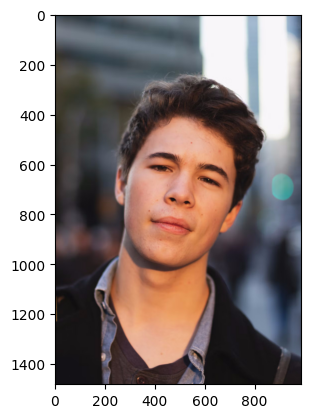

In [6]:
show(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

Changing the color model may help in isolating certain features.
Most important: HSV allows for more easily distinguishing contents by hue or saturation. 

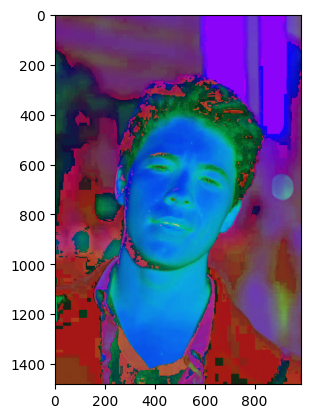

In [7]:
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
show(hsv)

In [8]:
h,s,v = cv2.split(hsv)

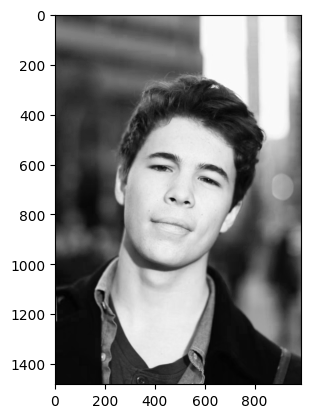

In [9]:
showg(v)

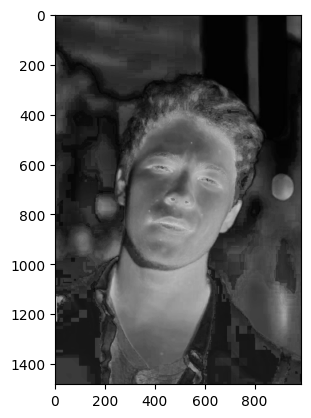

In [10]:
showg(s)

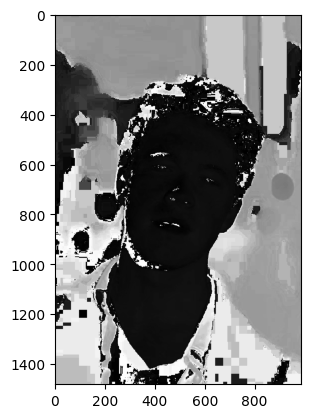

In [11]:
showg(h) # <- better for isolating skin tones

## Known operations

- Color Spaces - Color conversion - ``cv2.cvtColor()``
- Threshold - ``cv2.threshold()`` (check out ``THRESH_OTSU`` type)
- Blur / Sharpen - ``cv2.blur()``, ``cv2.filter2D()`` (convolution)
- Edge Detection - ``cv2.Canny()``, ``cv2.Sobel()``

## Image Pyramids

see also https://en.wikipedia.org/wiki/Pyramid_(image_processing)


- Downsampling images (halfing their resolution) removes detail.
- Pyramid: array of image layers at decreasing resolution
- Gaussian Pyramid: apply Gaussian blur before downsampling
- Laplacian pyramid: store differences between blurred and unblurred version for a layer

Why?

- first run detection algorithms at lower resolution (= faster), then decide if running at higher resolution sensible
- certain features disappear at lower resolutions -> use this to extract information
- only store difference between adjacent layers (Laplacian pyramid) -> use this for image compression and feature extraction

In [12]:
gray = v.copy()

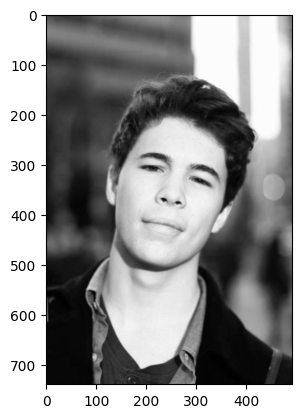

In [13]:
rows, cols = map(int, gray.shape)
gray = cv2.pyrDown(gray, dstsize=(cols//2, rows//2))
showg(gray)

In [14]:
gray = v.copy()

In [15]:
# repeat the following cell multiple times

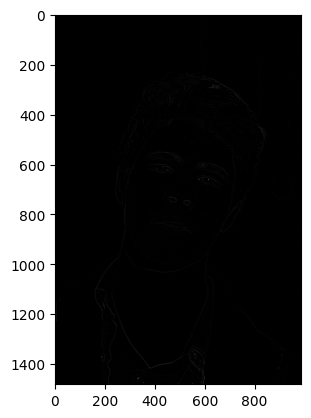

In [16]:
prev = gray.copy()
rows, cols = map(int, gray.shape)
gray = cv2.pyrDown(gray, dstsize=(cols//2, rows//2))
gray_up = cv2.pyrUp(gray, dstsize=(cols, rows))
# difference
diff = cv2.subtract(prev, gray_up)
showg(diff)

## Polar Coordinates

In [17]:
src = cv2.imread("images/chess.jpg")
rows, cols, _channels = map(int, src.shape)
pol = cv2.warpPolar(src, dsize=(-1, -1), center=(rows//2, cols//2), maxRadius = max([rows, cols]), flags=cv2.INTER_CUBIC)

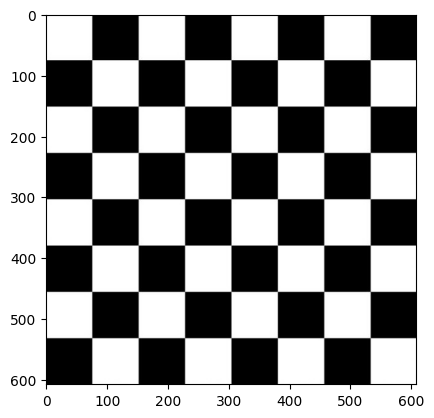

In [18]:
show(src)

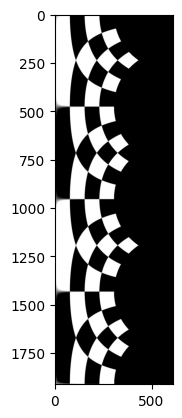

In [19]:
show(pol)

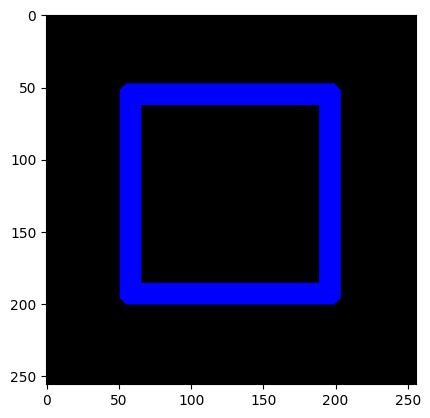

In [20]:
src = cv2.imread("images/rect1.png")
show(src)

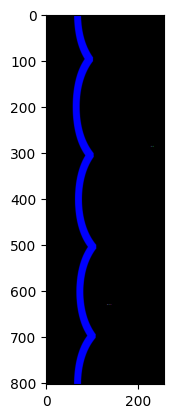

In [21]:
rows, cols, _channels = map(int, src.shape)
pol = cv2.warpPolar(src, dsize=(-1, -1), center=(rows//2, cols//2), maxRadius = max([rows, cols]), flags=cv2.INTER_CUBIC)
show(pol)

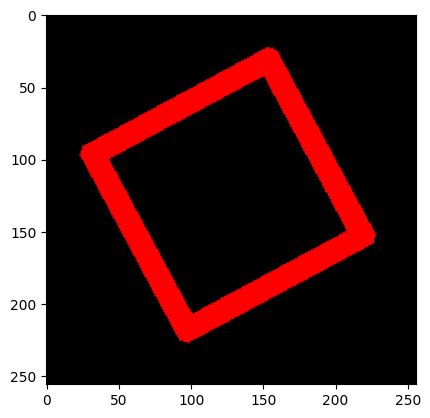

In [22]:
src = cv2.imread("images/rect2.png")
show(src)

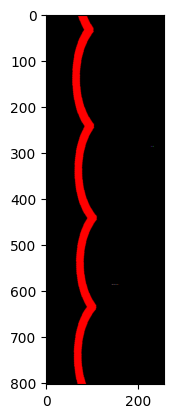

In [23]:
rows, cols, _channels = map(int, src.shape)
pol = cv2.warpPolar(src, dsize=(-1, -1), center=(rows//2, cols//2), maxRadius = max([rows, cols]), flags=cv2.INTER_CUBIC)
show(pol)

## Hough Transform

**Goal:** find straight lines in an image 

**General approach:** project x/y coordinate in image space to a line (angle / offset) in Hough space. The more pixels on a line, the more lines intersect in Hough space at one point (which then represents angle/offset of a line in the source image)

Similar approaches for circles (also in OpenCV) and for other shapes

In [24]:
src = cv2.imread("images/bunchofshapes.jpg")
#src = cv2.imread("images/sheet.jpg")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.Canny(gray, 10, 10)
thresh, gray = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

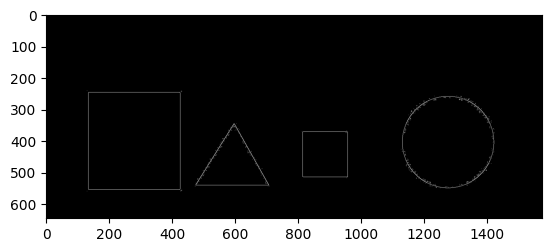

In [25]:
showg(gray)

In [26]:
lines = cv2.HoughLines(gray, 1, np.pi/180, 120) # for demo: 120 / 340
len(lines)

12

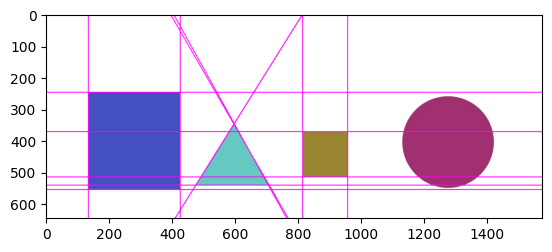

In [27]:
image = src.copy()
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 2000 * (-b))
    y1 = int(y0 + 2000 * (a))
    x2 = int(x0 - 2000 * (-b))
    y2 = int(y0 - 2000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 255), 2)
show(image)

## Contours

see also https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html

OpenCV implements [Suzuki, S. and Abe, K., Topological Structural Analysis of Digitized Binary Images by Border Following. CVGIP 30 1, pp 32-46 (1985)](https://www.sciencedirect.com/science/article/abs/pii/0734189X85900167)

In [28]:
contours, hierarchy = cv2.findContours(gray, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

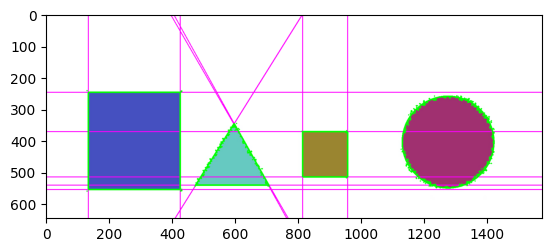

In [29]:
cv2.drawContours(image, contours, -1, (0,255,0), 3)
show(image)

### Exercise: 

Rotate the image above so that the lines are horizontal (ignore perspective transform)

Hint: use ``cv2.getRotationMatrix2D()`` and ``cv2.warpAffine()``

In [30]:
# TO DO

## Outlook

- run the "Where is Waldo" example from the "OpenCV-with-Python" tutorial
- try to find other objects in this image
- apply the approach to photographs - e.g. from the beach
- try out whether the approach can detect images from a different source in the photograph (e.g., an image of a beach ball on a beach)